In [1]:
import numpy as np
import numpy.random as random
from scipy.stats import qmc
import matplotlib.pyplot as plt

## 1D Sampling

In [2]:
sampler1d = qmc.Halton(1, scramble=True)

In [3]:
def sample1d(N, moment):
    u = random.random(N)
    h = sampler1d.random(n=N)

    rand = np.zeros(N)
    halton = np.zeros(N)

    for i in range(N):
        rand[i] = np.cbrt(u[i])
        halton[i] = np.cbrt(h[i][0])
        
    return np.mean(np.power(rand, moment)), np.mean(np.power(halton, moment))

#### Plotting

In [9]:
moment = 1
rand_rate = []
halton_rate = []

for i in range(5):
    N = 10**(i+4)
    N_1 = 10**(3)
    
    rand_rate = np.append(rand_rate, abs(sample1d(N_1, moment)[0] - .75) / abs(sample1d(N, moment)[0] - .75))
    halton_rate = np.append(halton_rate, abs(sample1d(N_1, moment)[1] - .75) / abs(sample1d(N, moment)[1] - .75))

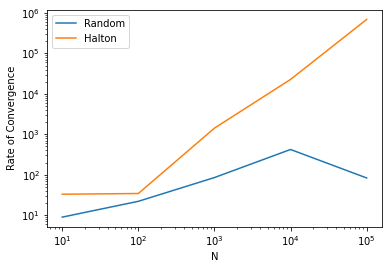

In [11]:
x = [10**1,10**2,10**3,10**4,10**5]
plt.plot(x, rand_rate, label='Random')
plt.plot(x, halton_rate, label='Halton')
plt.legend()
plt.xlabel('N')
plt.ylabel('Rate of Convergence')
plt.xscale('log')
plt.yscale('log')

##### First moment convergence

Converging to $$\int_0^1 \sqrt[3]{x} \, dx = 0.75$$

In [12]:
moment = 1

rand_rate = abs(sample1d(1000, moment)[0] - .75) / abs(sample1d(1000000, moment)[0] - .75)
halton_rate = abs(sample1d(1000, moment)[1] - .75) / abs(sample1d(1000000, moment)[1] - .75)

print('Pseudo random convergence rate:', rand_rate)
      
print('Halton random convergence rate:', halton_rate)

Pseudo random convergence rate: 19.514029974619426
Halton random convergence rate: 496.2444126376825


###### Second moment convergence

Converging to $$\int_0^1 \sqrt[3]{x^2} \, dx = 0.6$$

In [566]:
moment = 2

rand_rate = abs(sample1d(10000, moment)[0] - .6) / abs(sample1d(1000000, moment)[0] - .6)
halton_rate = abs(sample1d(10000, moment)[1] - .6) / abs(sample1d(1000000, moment)[1] - .6)

print('Pseudo random convergence rate:', rand_rate)
      
print('Halton random convergence rate:', halton_rate)

Pseudo random convergence rate: 45.87119855043671
Halton random convergence rate: 384.15554509551004


##### Third moment convergence

Converging to $$\int_0^1 \sqrt[3]{x^3} \, dx = 0.5$$

In [568]:
moment = 3

rand_rate = abs(sample1d(10000, moment)[0] - .5) / abs(sample1d(1000000, moment)[0] - .5)
halton_rate = abs(sample1d(10000, moment)[1] - .5) / abs(sample1d(1000000, moment)[1] - .5)

print('Pseudo random convergence rate:', rand_rate)
      
print('Halton random convergence rate:', halton_rate)

Pseudo random convergence rate: 14.320032828605175
Halton random convergence rate: 77.59463762367584


##### Fourth moment convergence

Converging to $$\int_0^1 \sqrt[3]{x^4} \, dx = \frac{3}{7}$$

In [569]:
moment = 4

rand_rate = abs(sample1d(10000, moment)[0] - (3/7)) / abs(sample1d(1000000, moment)[0] - (3/7))
halton_rate = abs(sample1d(10000, moment)[1] - (3/7)) / abs(sample1d(1000000, moment)[1] - (3/7))

print('Pseudo random convergence rate:', rand_rate)
      
print('Halton random convergence rate:', halton_rate)

Pseudo random convergence rate: 3.1099651314767156
Halton random convergence rate: 43.73573914443075


## 3D Sampling

In [527]:
sampler3d = qmc.Halton(3, scramble=False)

In [533]:
def sample3d(N, moment):
    u = random.random(N)
    h = sampler3d.random(n=N)

    rand = np.zeros(N)
    halton = np.zeros(N)

    for i in range(N):
        rand[i] = np.cbrt(u[i])
        halton[i] = np.cbrt(h[i][0])
        
    return np.mean(np.power(rand, moment)), np.mean(np.power(halton, moment))